In [10]:
import requests
import pandas as pd
from bs4 import BeautifulSoup

In [11]:
link = 'https://www.worldometers.info/coronavirus/'
page = requests.get(link)
page.status_code

200


<!DOCTYPE html>

<!--[if IE 8]> <html lang="en" class="ie8"> <![endif]-->
<!--[if IE 9]> <html lang="en" class="ie9"> <![endif]-->
<!--[if !IE]><!-->
<html lang="en">
<!--<![endif]-->
<head>
<meta charset="utf-8"/>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<meta content="width=device-width, initial-scale=1" name="viewport"/>
<title>COVID Live - Coronavirus Statistics - Worldometer</title>
<meta content="Live statistics and coronavirus news tracking the number of confirmed cases, recovered patients, tests, and death toll due to the COVID-19 coronavirus from Wuhan, China. Coronavirus counter with new cases, deaths, and number of tests per 1 Million population. Historical data and info. Daily charts, graphs, news and updates" name="description"/>
<link href="/favicon/favicon.ico" rel="shortcut icon" type="image/x-icon"/>
<link href="/favicon/apple-icon-57x57.png" rel="apple-touch-icon" sizes="57x57"/>
<link href="/favicon/apple-icon-60x60.png" rel="apple-touch-icon" sizes="6
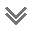

In [12]:
soup = BeautifulSoup(page.content)
soup

In [13]:
table = soup.find('table', attrs={'id': 'main_table_countries_today'})

In [14]:
rows = table.find_all("tr", attrs={"style": ""})

In [15]:
data = []
for i,item in enumerate(rows):
    if i == 0:
        data.append(item.text.strip().split("\n")[1:17])
        data[0][12]+=data[0][13]
        data[0]=data[0][:13]+data[0][-1:]
        data[0].append("Area")
    else:
        data.append(item.text.strip().split("\n")[1:16])

In [16]:
df = pd.DataFrame(data)
df = pd.DataFrame(data[2:-1], columns=data[0][:15])
df

,"Country,Other",TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/1M pop,Population,Area
0,USA,"80,270,563",,"963,371",,"52,199,829",,"27,107,363","10,400","240,195","2,883","942,817,780","2,821,212","334,188,863",North America
1,India,"42,865,431",,"512,652",,"42,178,214",,"174,565","8,944","30,569",366,"761,230,580","542,855","1,402,272,769",Asia
2,Brazil,"28,351,876",,"645,534",,"25,505,984",,"2,200,358","8,318","131,845","3,002","63,776,166","296,579","215,039,621",South America
3,France,"22,401,406",,"137,276",,"19,735,713",,"2,528,417","3,055","341,951","2,095","243,529,298","3,717,401","65,510,629",Europe
4,UK,"18,695,449",,"160,815",,"16,918,511",,"1,616,123",324,"273,040","2,349","477,969,909","6,980,577","68,471,406",Europe
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
215,Vatican City,29,,,,28,,1,,"36,070",,,,804,Europe
216,Vanuatu,15,,1,,6,,8,,47,3,"23,000","72,120","318,915",Australia/Oceania
217,Western Sahara,10,,1,,8,,1,,16,2,,,"621,421",Africa
218,Cook Islands,4,,,,,,4,,227,,863,"49,062","17,590",Australia/Oceania


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 220 entries, 0 to 219
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Country,Other     220 non-null    object
 1   TotalCases        220 non-null    object
 2   NewCases          220 non-null    object
 3   TotalDeaths       220 non-null    object
 4   NewDeaths         220 non-null    object
 5   TotalRecovered    220 non-null    object
 6   NewRecovered      220 non-null    object
 7   ActiveCases       220 non-null    object
 8   Serious,Critical  220 non-null    object
 9   Tot Cases/1M pop  220 non-null    object
 10  Deaths/1M pop     220 non-null    object
 11  TotalTests        220 non-null    object
 12  Tests/1M pop      220 non-null    object
 13  Population        220 non-null    object
 14  Area              220 non-null    object
dtypes: object(15)
memory usage: 25.9+ KB


In [20]:
df.to_csv('data.csv',index=False)